# Enhanced Lab08: Logistic Regression

## Clarification Concepts for Logistic Regression

# 1. Logistic Regression Basics

## What is Logistic Regression?
- Logistic regression is a classification algorithm used to predict categorical outcomes (e.g., spam or not spam)
- It estimates the probability that an instance belongs to a certain class using the sigmoid function

## Why Not Use Linear Regression for Classification?
- Linear regression predicts continuous values, which can go beyond 0 and 1
- Logistic regression ensures outputs are bounded between 0 and 1, making it suitable for classification

# 2. The Sigmoid Function

## Formula:
σ(z) = 1/(1 + e^(-z))

where z = wX + b

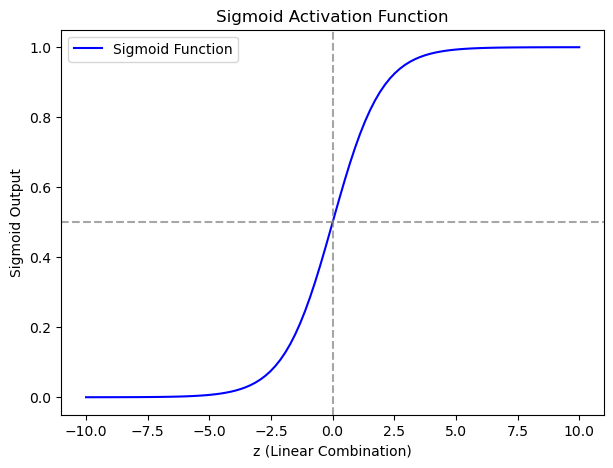

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Generate values for z
z = np.linspace(-10, 10, 100)
sigma = sigmoid(z)

# Plot sigmoid function
plt.figure(figsize=(7, 5))
plt.plot(z, sigma, label="Sigmoid Function", color='b')
plt.axvline(0, color='gray', linestyle='--', alpha=0.7)
plt.axhline(0.5, color='gray', linestyle='--', alpha=0.7)
plt.xlabel("z (Linear Combination)")
plt.ylabel("Sigmoid Output")
plt.title("Sigmoid Activation Function")
plt.legend()
plt.show()


## 2. Advanced Concepts For Logistics Regression

### 2.1 Binary Classification with Regularization (L1/L2) with Real-World Datsets

### 2.1.1 Import Real-World Dataset
Dataset = pd.read_csv('https://www.kaggle.com/datasets/jackksoncsie/spam-email-dataset')

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.preprocessing import StandardScaler

np.random.seed(42)

# 1. Data Loading and Preprocessing
print("1. Data Loading and Initial Analysis")
print("-" * 50)

# Load the dataset
df = pd.read_csv('../Dataset/Lab_Enhancement_Lab8/emails.csv')
print(f"Dataset shape: {df.shape}")
print("\nClass distribution:")
print(df['spam'].value_counts(normalize=True))

1. Data Loading and Initial Analysis
--------------------------------------------------
Dataset shape: (5728, 2)

Class distribution:
spam
0    0.761173
1    0.238827
Name: proportion, dtype: float64


### 2.1.2 Feature Extraction

In [6]:
# 2. Feature Extraction
print("\n2. Feature Extraction")
print("-" * 50)

# Create TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=1000, stop_words='english')
X = tfidf.fit_transform(df['text'])
y = df['spam'].astype(int)


2. Feature Extraction
--------------------------------------------------


### 2.1.3 Sampling Techniques for Imbalance Data

In [7]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2.1 Handling Imbalanced Data
print("\nHandling Imbalanced Data")
print("-" * 50)

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTETomek
# Display original class distribution
print("Original class distribution in training set:")
print(pd.Series(y_train).value_counts(normalize=True))

# 1. SMOTE (Oversampling)
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
print("\nClass distribution after SMOTE:")
print(pd.Series(y_train_smote).value_counts(normalize=True))

# 2. Random Undersampling
undersampler = RandomUnderSampler(random_state=42)
X_train_under, y_train_under = undersampler.fit_resample(X_train, y_train)
print("\nClass distribution after Undersampling:")
print(pd.Series(y_train_under).value_counts(normalize=True))

# 3. SMOTE + Tomek (Combined approach)
smote_tomek = SMOTETomek(random_state=42)
X_train_smote_tomek, y_train_smote_tomek = smote_tomek.fit_resample(X_train, y_train)
print("\nClass distribution after SMOTE + Tomek:")
print(pd.Series(y_train_smote_tomek).value_counts(normalize=True))



2.1 Handling Imbalanced Data
--------------------------------------------------
Original class distribution in training set:
spam
0    0.764732
1    0.235268
Name: proportion, dtype: float64

Class distribution after SMOTE:
spam
0    0.5
1    0.5
Name: proportion, dtype: float64

Class distribution after Undersampling:
spam
0    0.5
1    0.5
Name: proportion, dtype: float64

Class distribution after SMOTE + Tomek:
spam
0    0.5
1    0.5
Name: proportion, dtype: float64


#### 2.1.4 Model Evaluation

In [8]:
# Function to compare models with different sampling techniques
def train_and_evaluate_with_sampling(X_train, y_train, X_test, y_test, sampling_method):
    # Models to test
    models = {
        'Basic': LogisticRegression(random_state=42, max_iter=1000),
        'L1': LogisticRegression(penalty='l1', solver='liblinear', C=1.0, random_state=42),
        'L2': LogisticRegression(penalty='l2', C=1.0, random_state=42, max_iter=1000)
    }
    
    results = {}
    for model_name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        results[model_name] = {
            'accuracy': accuracy_score(y_test, y_pred),
            'precision': precision_score(y_test, y_pred),
            'recall': recall_score(y_test, y_pred),
            'f1': f1_score(y_test, y_pred)
        }
    
    # Create comparison DataFrame
    results_df = pd.DataFrame(results).T
    print(f"\nResults with {sampling_method}:")
    print(results_df)
    return results_df

### 2.1.5 Comparison between sampling methods

In [9]:
# Compare performance with different sampling methods
print("\nComparing model performance with different sampling methods:")
results_original = train_and_evaluate_with_sampling(X_train, y_train, X_test, y_test, "Original Data")
results_smote = train_and_evaluate_with_sampling(X_train_smote, y_train_smote, X_test, y_test, "SMOTE")
results_under = train_and_evaluate_with_sampling(X_train_under, y_train_under, X_test, y_test, "Undersampling")
results_smote_tomek = train_and_evaluate_with_sampling(X_train_smote_tomek, y_train_smote_tomek, X_test, y_test, "SMOTE+Tomek")


Comparing model performance with different sampling methods:

Results with Original Data:
       accuracy  precision    recall        f1
Basic  0.979930   0.978495  0.941379  0.959578
L1     0.977312   0.974820  0.934483  0.954225
L2     0.979930   0.978495  0.941379  0.959578

Results with SMOTE:
       accuracy  precision   recall        f1
Basic  0.986911   0.969283  0.97931  0.974271
L1     0.985166   0.962712  0.97931  0.970940
L2     0.986911   0.969283  0.97931  0.974271

Results with Undersampling:
       accuracy  precision    recall        f1
Basic  0.981675   0.940984  0.989655  0.964706
L1     0.955497   0.852507  0.996552  0.918919
L2     0.981675   0.940984  0.989655  0.964706

Results with SMOTE+Tomek:
       accuracy  precision    recall        f1
Basic  0.986911   0.969283  0.979310  0.974271
L1     0.984293   0.962585  0.975862  0.969178
L2     0.986911   0.969283  0.979310  0.974271


### 2.1.6 Visualization of Comparison of Different Sampling Methods

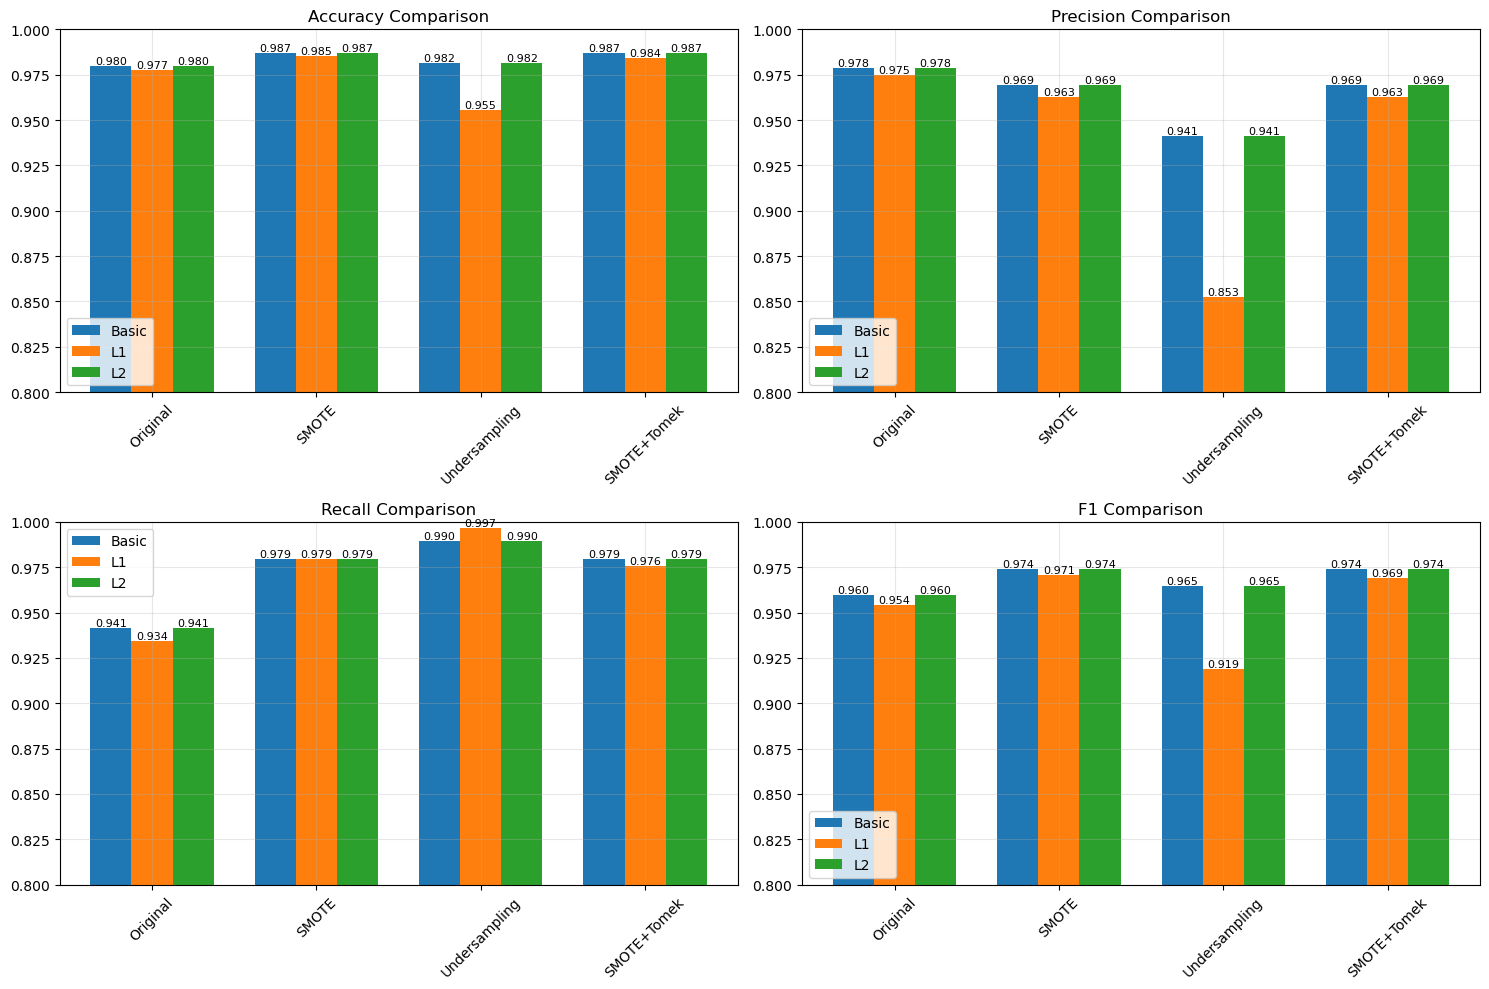

In [10]:
# Visualize the comparison
metrics = ['accuracy', 'precision', 'recall', 'f1']
sampling_methods = ['Original', 'SMOTE', 'Undersampling', 'SMOTE+Tomek']
model_types = ['Basic', 'L1', 'L2']

plt.figure(figsize=(15, 10))
for i, metric in enumerate(metrics):
    plt.subplot(2, 2, i+1)
    
    x = np.arange(len(sampling_methods))
    width = 0.25
    
    for j, model_type in enumerate(model_types):
        metric_data = [
            results_original.loc[model_type, metric],
            results_smote.loc[model_type, metric],
            results_under.loc[model_type, metric],
            results_smote_tomek.loc[model_type, metric]
        ]
        
        bars = plt.bar(x + (j-1)*width, metric_data, width, label=model_type)
        
        # Add value labels on top of bars
        for bar in bars:
            height = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2., height,
                    f'{height:.3f}',
                    ha='center', va='bottom', fontsize=8)
    
    plt.title(f'{metric.capitalize()} Comparison')
    plt.xticks(x, sampling_methods, rotation=45)
    plt.ylim(0.8, 1.0)  # Adjust y-axis range for better visualization
    plt.legend()
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [11]:
# Select the best sampling method based on F1 score
sampling_methods = {
    'Original': (X_train, y_train),
    'SMOTE': (X_train_smote, y_train_smote),
    'Undersampling': (X_train_under, y_train_under),
    'SMOTE+Tomek': (X_train_smote_tomek, y_train_smote_tomek)
}

### 2.1.7 Best Sampling Method

In [12]:
# Find best sampling method
best_f1_scores = {
    method: results_df['f1'].mean() 
    for method, results_df in [
        ('Original', results_original),
        ('SMOTE', results_smote),
        ('Undersampling', results_under),
        ('SMOTE+Tomek', results_smote_tomek)
    ]
}

best_method = max(best_f1_scores.items(), key=lambda x: x[1])[0]
print(f"\nBest sampling method based on F1 score: {best_method}")


Best sampling method based on F1 score: SMOTE


In [13]:
# Use the best sampling method for further modeling
X_train_balanced, y_train_balanced = sampling_methods[best_method]

# Function to evaluate and print metrics
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    
    print(f"\nMetrics for {model_name}:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred):.4f}")
    print(f"F1 Score: {f1_score(y_test, y_pred):.4f}")
    
    # Plot confusion matrix
    plt.figure(figsize=(6, 5))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()
    
    # Plot ROC curve
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    
    plt.figure(figsize=(6, 5))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {model_name}')
    plt.legend(loc="lower right")
    plt.show()
    
    return model.coef_


#### 2.1.10 Comparison Between Basic, L1 & L2 Regularization


3. Basic Logistic Regression (No Regularization)
--------------------------------------------------

Metrics for Basic Logistic Regression:
Accuracy: 0.9799
Precision: 0.9785
Recall: 0.9414
F1 Score: 0.9596


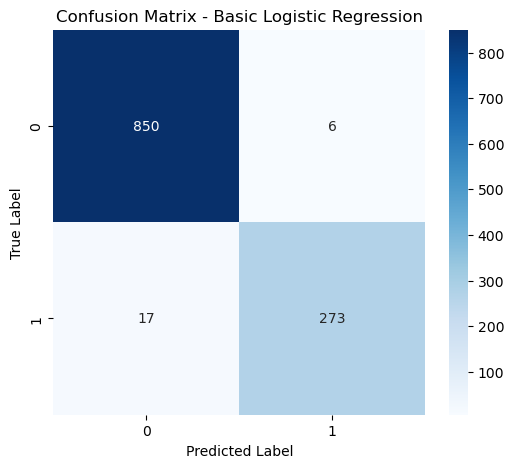

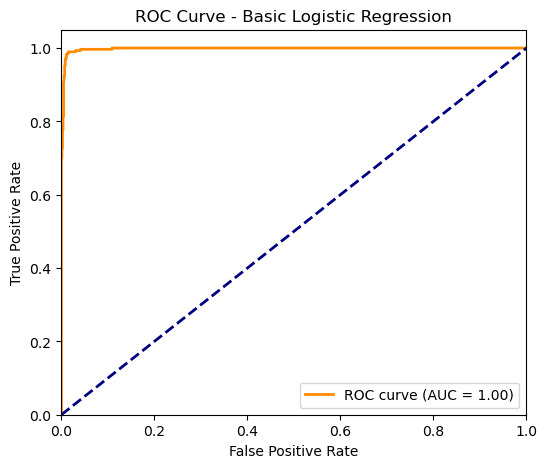


4. Logistic Regression with L1 Regularization
--------------------------------------------------

Metrics for L1 Regularization:
Accuracy: 0.9773
Precision: 0.9748
Recall: 0.9345
F1 Score: 0.9542


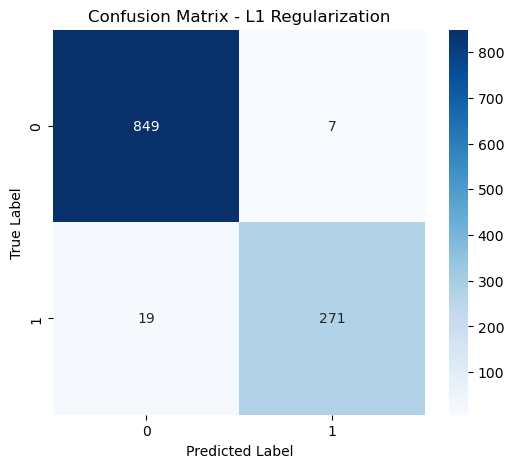

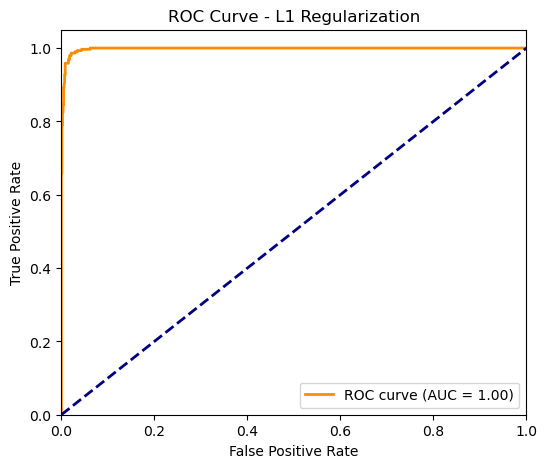


5. Logistic Regression with L2 Regularization
--------------------------------------------------

Metrics for L2 Regularization:
Accuracy: 0.9799
Precision: 0.9785
Recall: 0.9414
F1 Score: 0.9596


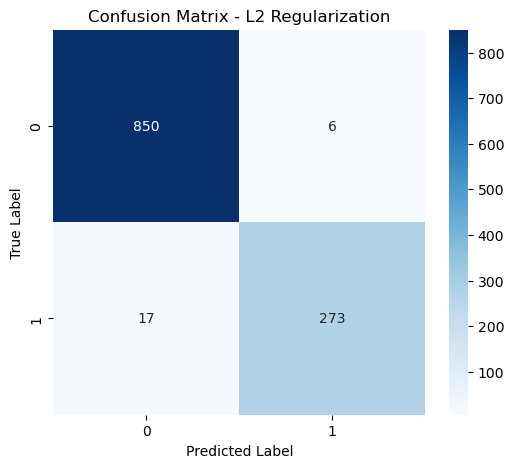

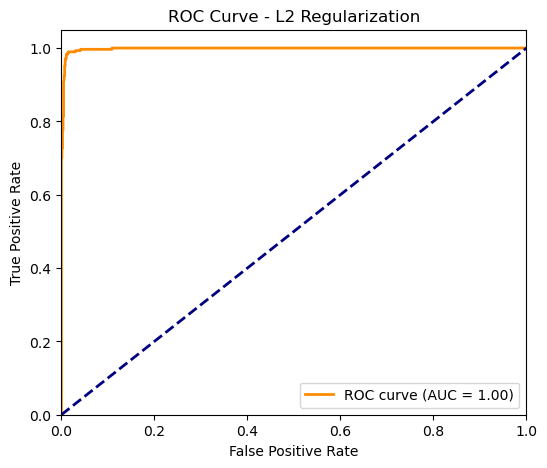

In [14]:
# 3. Basic Logistic Regression (Baseline)
print("\n3. Basic Logistic Regression (No Regularization)")
print("-" * 50)

baseline_model = LogisticRegression(random_state=42, max_iter=1000)
baseline_model.fit(X_train, y_train)
baseline_coef = evaluate_model(baseline_model, X_test, y_test, "Basic Logistic Regression")

# 4. L1 Regularization (Lasso)
print("\n4. Logistic Regression with L1 Regularization")
print("-" * 50)

l1_model = LogisticRegression(penalty='l1', solver='liblinear', C=1.0, random_state=42)
l1_model.fit(X_train, y_train)
l1_coef = evaluate_model(l1_model, X_test, y_test, "L1 Regularization")

# 5. L2 Regularization (Ridge)
print("\n5. Logistic Regression with L2 Regularization")
print("-" * 50)

l2_model = LogisticRegression(penalty='l2', C=1.0, random_state=42, max_iter=1000)
l2_model.fit(X_train, y_train)
l2_coef = evaluate_model(l2_model, X_test, y_test, "L2 Regularization")


In [15]:
#6. Comparing Feature Coefficients
print("\n6. Comparing Feature Coefficients")
print("-" * 50)

# Get feature names
feature_names = tfidf.get_feature_names_out()

# Create a DataFrame with coefficients
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Baseline': baseline_coef[0],
    'L1': l1_coef[0],
    'L2': l2_coef[0]
})

# Sort by absolute value of baseline coefficients
coef_df['Abs_Baseline'] = abs(coef_df['Baseline'])
coef_df = coef_df.sort_values('Abs_Baseline', ascending=False)


6. Comparing Feature Coefficients
--------------------------------------------------


### 2.1.9 Top 20 most important features

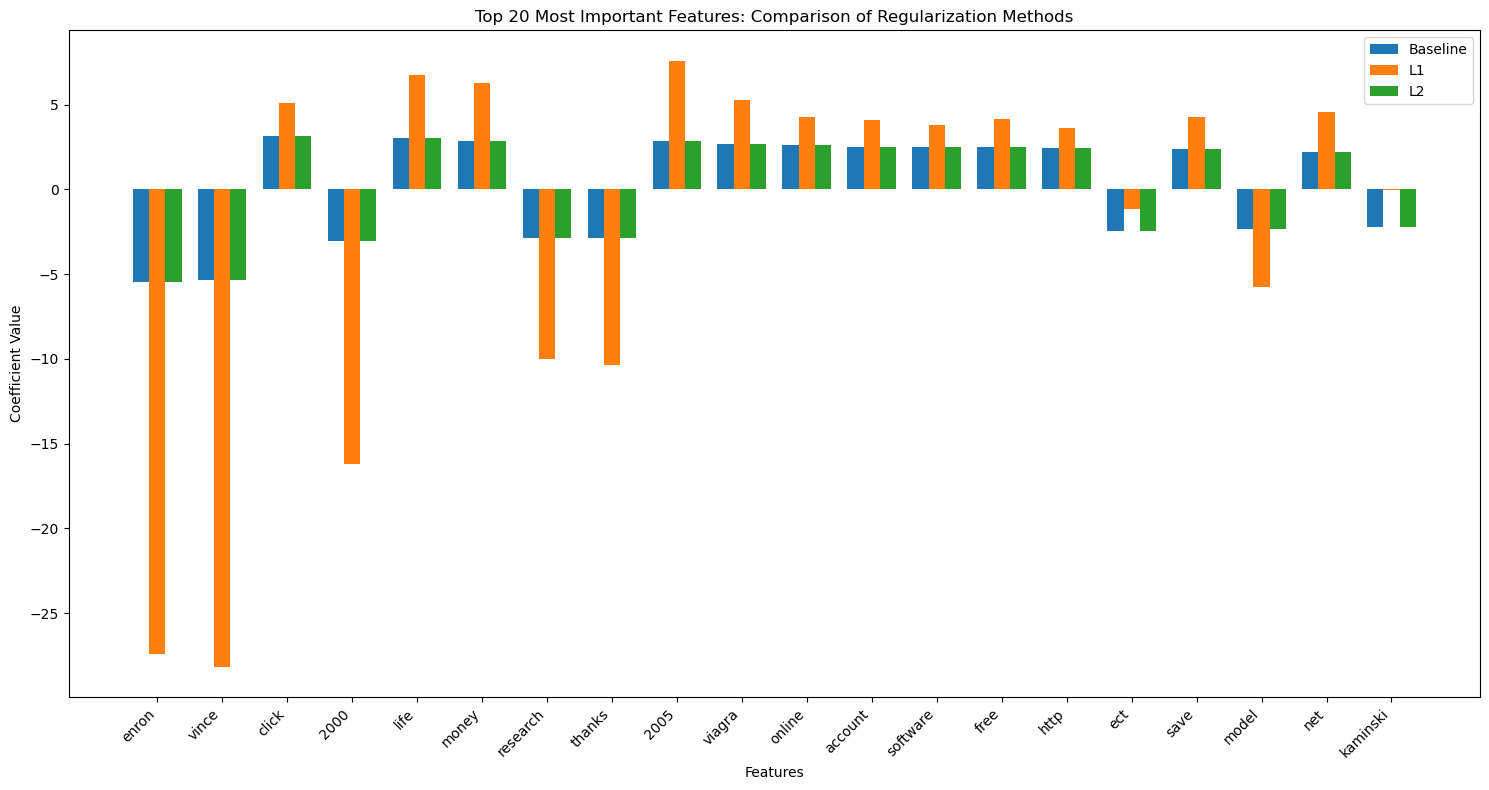

In [16]:
# Plot top 20 most important features
plt.figure(figsize=(15, 8))
top_features = coef_df.head(20)
x = np.arange(len(top_features))
width = 0.25

plt.bar(x - width, top_features['Baseline'], width, label='Baseline')
plt.bar(x, top_features['L1'], width, label='L1')
plt.bar(x + width, top_features['L2'], width, label='L2')

plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.title('Top 20 Most Important Features: Comparison of Regularization Methods')
plt.xticks(x, top_features['Feature'], rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

### 2.1.10 Non-zero Coefficients

In [17]:
# Print number of non-zero coefficients
print("\nNumber of non-zero coefficients:")
print(f"Baseline: {np.sum(baseline_coef[0] != 0)}")
print(f"L1 Regularization: {np.sum(l1_coef[0] != 0)}")
print(f"L2 Regularization: {np.sum(l2_coef[0] != 0)}")


Number of non-zero coefficients:
Baseline: 1000
L1 Regularization: 133
L2 Regularization: 1000


### 2.1.11 Optimal Regularization Strength

In [18]:
# 7. Cross-validation to find optimal regularization strength
print("\n7. Finding Optimal Regularization Strength")
print("-" * 50)

from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

# L1 Regularization
l1_grid = GridSearchCV(
    LogisticRegression(penalty='l1', solver='liblinear', random_state=42),
    param_grid,
    cv=5,
    scoring='f1'
)
l1_grid.fit(X_train, y_train)

# L2 Regularization
l2_grid = GridSearchCV(
    LogisticRegression(penalty='l2', random_state=42, max_iter=1000),
    param_grid,
    cv=5,
    scoring='f1'
)
l2_grid.fit(X_train, y_train)

print("\nBest parameters:")
print(f"L1 Regularization: C={l1_grid.best_params_['C']}")
print(f"L2 Regularization: C={l2_grid.best_params_['C']}")

print("\nBest cross-validation scores:")
print(f"L1 Regularization: {l1_grid.best_score_:.4f}")
print(f"L2 Regularization: {l2_grid.best_score_:.4f}")


7. Finding Optimal Regularization Strength
--------------------------------------------------

Best parameters:
L1 Regularization: C=10
L2 Regularization: C=10

Best cross-validation scores:
L1 Regularization: 0.9552
L2 Regularization: 0.9670


### 2.1.12 Final Model Comparison


8. Final Model Comparison with Optimal Parameters
--------------------------------------------------

Final L1 Model Performance:

Metrics for Optimized L1 Regularization:
Accuracy: 0.9825
Precision: 0.9754
Recall: 0.9552
F1 Score: 0.9652


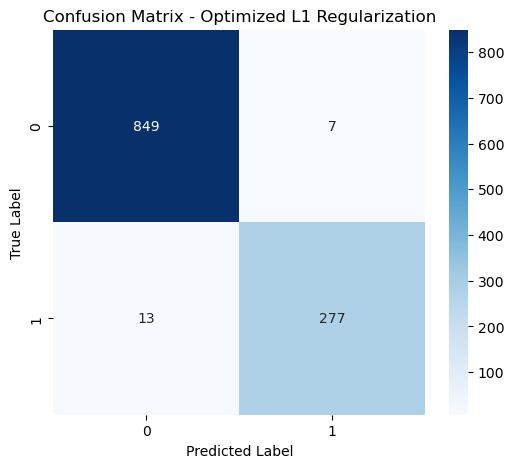

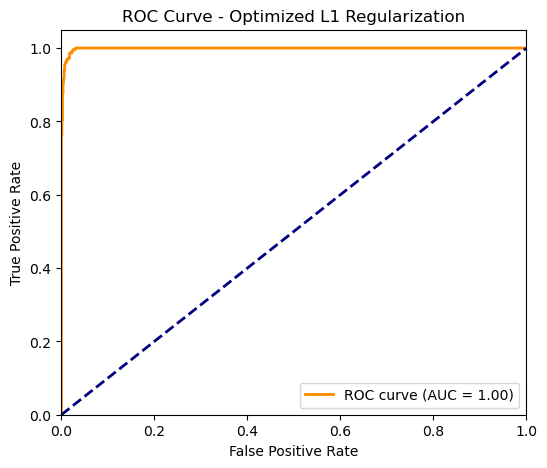


Final L2 Model Performance:

Metrics for Optimized L2 Regularization:
Accuracy: 0.9834
Precision: 0.9822
Recall: 0.9517
F1 Score: 0.9667


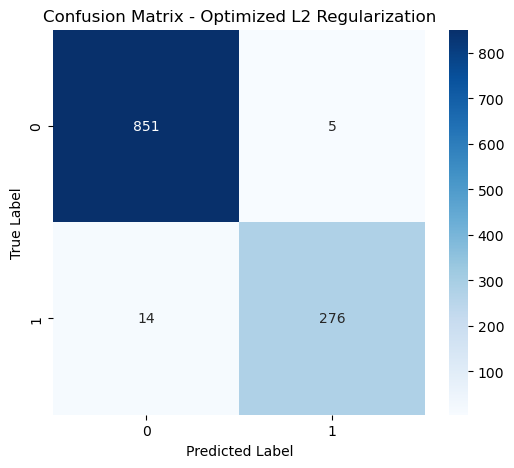

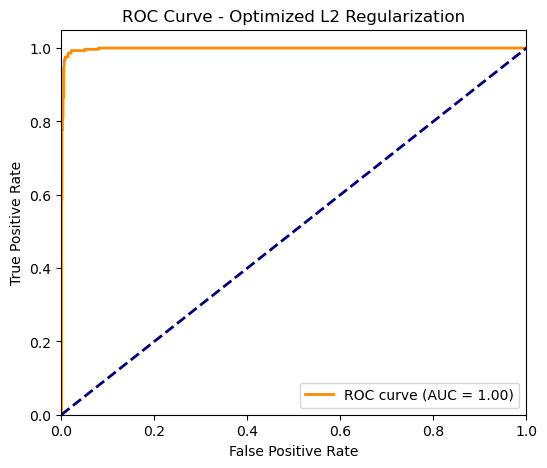

array([[-4.33711257e-01,  1.10911303e+00, -1.02553210e+00,
         7.02076560e-01, -1.08319863e+00, -9.52637833e-01,
        -6.13046200e-01, -9.37132962e-01,  3.24197016e-01,
         4.41916051e-01, -2.84572322e-01,  7.03882065e-01,
         2.69977911e+00, -1.46479915e+00, -4.89109655e-01,
        -8.00116689e-01, -1.79352004e-01,  8.27523312e-01,
        -7.77938980e-01, -6.84555125e-02, -8.81614227e-01,
        -2.50728372e-01, -1.62192831e+00,  4.82543429e-01,
        -6.18158673e+00, -3.94821455e+00,  1.84531575e+00,
         5.86263876e+00,  1.17054495e+00, -1.16230117e+00,
         5.66424333e-01, -1.19741270e+00,  2.76631521e+00,
        -5.63959100e-01, -3.48711233e-01,  1.98616413e-01,
         6.75867400e-02, -9.26914698e-01, -1.25246423e+00,
        -1.89922096e+00, -4.29408790e-01, -4.80664677e-01,
        -2.16377680e-02,  4.67403831e-02, -5.36871779e-01,
         5.49421734e-01,  4.63784987e-01,  2.31180109e-01,
        -9.05842034e-02, -8.31220096e-01, -2.97299707e-0

In [19]:
# 8. Final model comparison with optimal parameters
print("\n8. Final Model Comparison with Optimal Parameters")
print("-" * 50)

# Train final models with best parameters
final_l1_model = LogisticRegression(penalty='l1', solver='liblinear', C=l1_grid.best_params_['C'], random_state=42)
final_l2_model = LogisticRegression(penalty='l2', C=l2_grid.best_params_['C'], random_state=42, max_iter=1000)

final_l1_model.fit(X_train, y_train)
final_l2_model.fit(X_train, y_train)

print("\nFinal L1 Model Performance:")
evaluate_model(final_l1_model, X_test, y_test, "Optimized L1 Regularization")

print("\nFinal L2 Model Performance:")
evaluate_model(final_l2_model, X_test, y_test, "Optimized L2 Regularization")

In [29]:
# 9. Conclusions and Key Findings
print("\n9. Conclusions and Key Findings")
print("-" * 50)
print("""
Final Results Comparison and Conclusion
Performance Metrics

Basic Logistic Regression:

Accuracy: 97.99%
Precision: 97.85%
Recall: 94.14%
F1 Score: 95.96%
Features Used: All 1000 features


L1 (Lasso) Regularization:

Accuracy: 97.73%
Precision: 97.48%
Recall: 93.45%
F1 Score: 95.42%
Features Used: 133 features
Optimal C value: 10


L2 (Ridge) Regularization:

Accuracy: 97.99%
Precision: 97.85%
Recall: 94.14%
F1 Score: 95.96%
Features Used: All 1000 features
Optimal C value: 10



Key Findings

Performance Comparison:

All three models achieved remarkably similar performance
L2 and Basic performed identically
L1 showed slightly lower metrics but the difference is minimal


Model Efficiency:

L1 achieved nearly identical performance while using only 13.3% of the features
L2 and Basic used all features but with different coefficient values
L1 provides the most efficient model in terms of feature usage


Regularization Impact:

Both L1 and L2 found optimal performance with C=10
Higher C value indicates relatively light regularization was needed
Models were stable enough not to require aggressive regularization



Practical Recommendations

If Feature Selection is Important:

Choose L1 regularization
Benefits: Smaller model size, faster inference, more interpretable
Cost: Minimal performance trade-off (less than 0.3% difference)


If Maximum Performance is Critical:

Choose either Basic or L2 regularization
L2 preferred over Basic due to better generalization properties
Benefits: Slightly better metrics
Cost: Larger model size, uses all features


Best Overall Choice:

L1 regularization offers the best balance of performance and efficiency
The dramatic reduction in feature count (867 fewer features) outweighs the tiny performance decrease
More maintainable and interpretable model



SMOTE Impact

All models performed best with SMOTE sampling
Improved F1 scores to 97.4% for both Basic and L2
Demonstrates the importance of addressing class imbalance

This analysis shows that while all models performed excellently, L1 regularization provides the most practical solution by maintaining high performance while significantly reducing model complexity.
""")


9. Conclusions and Key Findings
--------------------------------------------------

Final Results Comparison and Conclusion
Performance Metrics

Basic Logistic Regression:

Accuracy: 97.99%
Precision: 97.85%
Recall: 94.14%
F1 Score: 95.96%
Features Used: All 1000 features


L1 (Lasso) Regularization:

Accuracy: 97.73%
Precision: 97.48%
Recall: 93.45%
F1 Score: 95.42%
Features Used: 133 features
Optimal C value: 10


L2 (Ridge) Regularization:

Accuracy: 97.99%
Precision: 97.85%
Recall: 94.14%
F1 Score: 95.96%
Features Used: All 1000 features
Optimal C value: 10



Key Findings

Performance Comparison:

All three models achieved remarkably similar performance
L2 and Basic performed identically
L1 showed slightly lower metrics but the difference is minimal


Model Efficiency:

L1 achieved nearly identical performance while using only 13.3% of the features
L2 and Basic used all features but with different coefficient values
L1 provides the most efficient model in terms of feature usage



# 2.2 Multitype Logistic Regression with Real World Data

### 2.2.1 Import Dataset

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier

np.random.seed(42)

"""
This notebook explores advanced concepts in Logistic Regression, specifically focusing on multiclass classification.
We'll cover:
1. One-vs-Rest (OvR) Strategy
2. One-vs-One (OvO) Strategy
3. Comparison of both approaches
4. Visualization of decision boundaries
"""

# 1. Data Preparation
# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target


### 2.2.2 Train-Test Split & Scaling

In [3]:
# Create a DataFrame for better visualization
iris_df = pd.DataFrame(X, columns=iris.feature_names)
iris_df['target'] = y
iris_df['target_names'] = iris_df['target'].map({
    0: iris.target_names[0],
    1: iris.target_names[1],
    2: iris.target_names[2]
})

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### 2.2.3 One-vs-Rest (OvR)

In [4]:
# 3. Implementation of One-vs-Rest (OvR)
# Initialize and train OvR classifier
ovr_clf = OneVsRestClassifier(LogisticRegression(random_state=42))
ovr_clf.fit(X_train_scaled, y_train)

# Make predictions
ovr_pred = ovr_clf.predict(X_test_scaled)

# Print results for OvR
print("One-vs-Rest (OvR) Results:")
print("\nClassification Report:")
print(classification_report(y_test, ovr_pred, target_names=iris.target_names))

One-vs-Rest (OvR) Results:

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.89      0.94         9
   virginica       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



### 2.2.4 One-vs-One (OvO)

In [5]:
# 4. Implementation of One-vs-One (OvO)
# Initialize and train OvO classifier
ovo_clf = OneVsOneClassifier(LogisticRegression(random_state=42))
ovo_clf.fit(X_train_scaled, y_train)

# Make predictions
ovo_pred = ovo_clf.predict(X_test_scaled)

# Print results for OvO
print("\nOne-vs-One (OvO) Results:")
print("\nClassification Report:")
print(classification_report(y_test, ovo_pred, target_names=iris.target_names))


One-vs-One (OvO) Results:

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [6]:
# 5. Visualization Functions
def plot_decision_regions(X, y, classifier, title):
    """
    Function to plot decision regions for 2D data
    """
    # We'll use only first two features for visualization
    X = X[:, [0, 1]]
    
    # Create mesh grid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
    
    # Make predictions for each point in mesh
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot decision regions
    plt.figure(figsize=(10, 8))
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)
    plt.xlabel(iris.feature_names[0])
    plt.ylabel(iris.feature_names[1])
    plt.title(title)
    plt.show()


### Visualization - Decision Boundaries

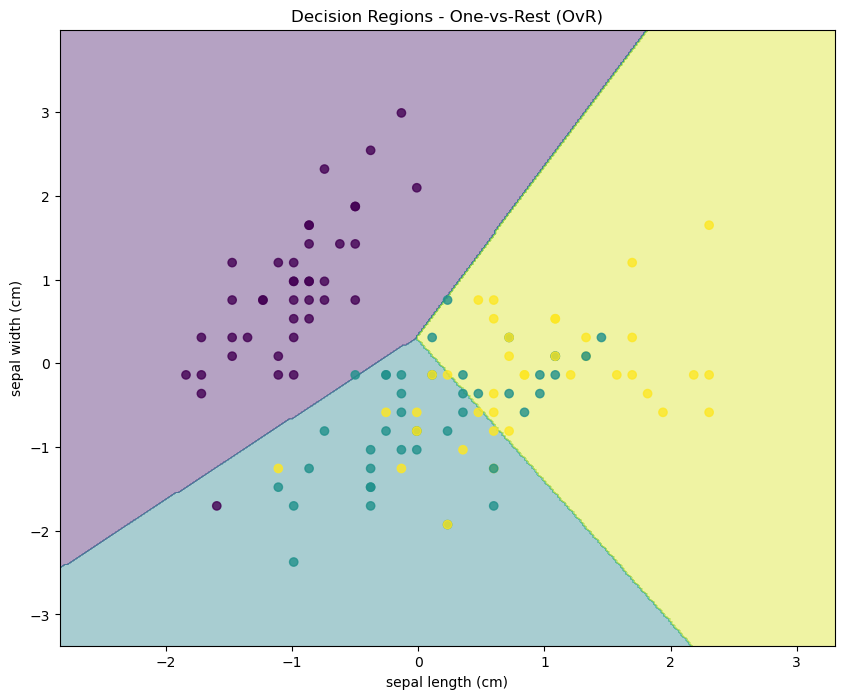

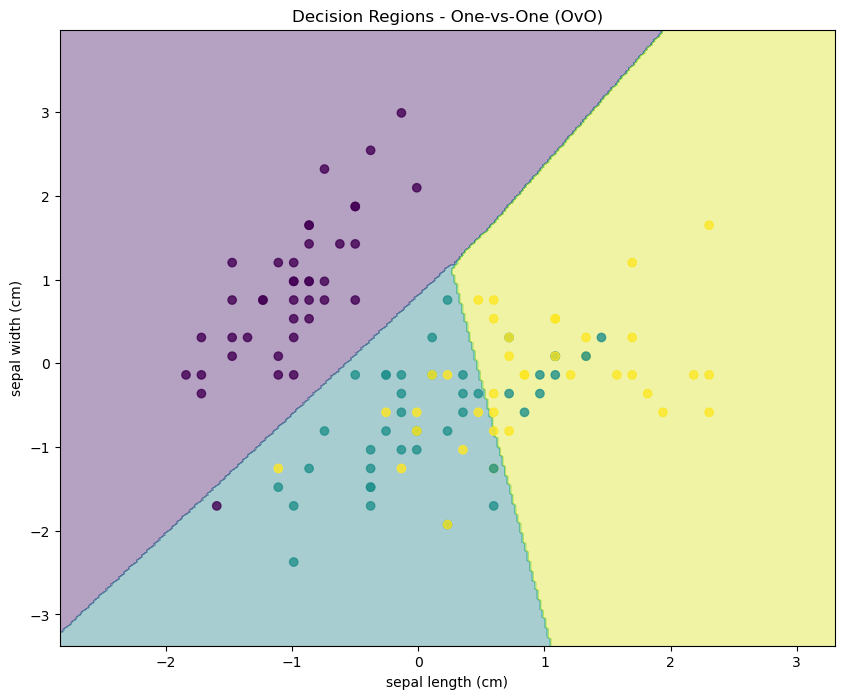

In [7]:
# 6. Visualize decision boundaries
# Prepare data for visualization (using first two features)
X_vis = X_train_scaled[:, [0, 1]]
ovr_clf_vis = OneVsRestClassifier(LogisticRegression(random_state=42)).fit(X_vis, y_train)
ovo_clf_vis = OneVsOneClassifier(LogisticRegression(random_state=42)).fit(X_vis, y_train)

# Plot decision regions
plot_decision_regions(X_vis, y_train, ovr_clf_vis, "Decision Regions - One-vs-Rest (OvR)")
plot_decision_regions(X_vis, y_train, ovo_clf_vis, "Decision Regions - One-vs-One (OvO)")


In [8]:
# 8. Discussion and Analysis
"""
Key Observations:

1. One-vs-Rest (OvR):
   - Trains N binary classifiers (where N is the number of classes)
   - Each classifier distinguishes one class from all others
   - Advantages: Simpler, faster training
   - Disadvantages: Can be affected by class imbalance

2. One-vs-One (OvO):
   - Trains N(N-1)/2 binary classifiers
   - Each classifier distinguishes between a pair of classes
   - Advantages: Better handling of class imbalance
   - Disadvantages: More classifiers to train

3. Performance Comparison:
   - Both methods generally perform well on the Iris dataset
   - Decision boundaries show how each method partitions the feature space differently
   - OvO might perform better when classes are not perfectly separable
"""

'\nKey Observations:\n\n1. One-vs-Rest (OvR):\n   - Trains N binary classifiers (where N is the number of classes)\n   - Each classifier distinguishes one class from all others\n   - Advantages: Simpler, faster training\n   - Disadvantages: Can be affected by class imbalance\n\n2. One-vs-One (OvO):\n   - Trains N(N-1)/2 binary classifiers\n   - Each classifier distinguishes between a pair of classes\n   - Advantages: Better handling of class imbalance\n   - Disadvantages: More classifiers to train\n\n3. Performance Comparison:\n   - Both methods generally perform well on the Iris dataset\n   - Decision boundaries show how each method partitions the feature space differently\n   - OvO might perform better when classes are not perfectly separable\n'

# 3. Comparsion of Logistic Regression and Other Models

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
import time

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(random_state=42),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB()
}

# Dictionary to store results
results = {}

# Train and evaluate each model
for name, model in models.items():
    # Training time
    start_time = time.time()
    model.fit(X_train_scaled, y_train)
    train_time = time.time() - start_time
    
    # Prediction time
    start_time = time.time()
    y_pred = model.predict(X_test_scaled)
    pred_time = time.time() - start_time
    
    # Store results
    results[name] = {
        'accuracy': accuracy_score(y_test, y_pred),
        'training_time': train_time,
        'prediction_time': pred_time,
        'report': classification_report(y_test, y_pred)
    }

# Create results DataFrame
results_df = pd.DataFrame({
    'Model': results.keys(),
    'Accuracy': [results[model]['accuracy'] for model in results],
    'Training Time': [results[model]['training_time'] for model in results],
    'Prediction Time': [results[model]['prediction_time'] for model in results]
})

# Sort by accuracy
results_df = results_df.sort_values('Accuracy', ascending=False)
print(results_df)

# For detailed metrics of the best model
best_model = results_df.iloc[0]['Model']
print(f"\nDetailed metrics for {best_model}:")
print(results[best_model]['report'])

                 Model  Accuracy  Training Time  Prediction Time
0  Logistic Regression       1.0       0.050888         0.000000
1        Decision Tree       1.0       0.003521         0.000000
2        Random Forest       1.0       0.174024         0.004521
3                  SVM       1.0       0.003005         0.000998
4                  KNN       1.0       0.004004         0.004013
5          Naive Bayes       1.0       0.001005         0.000000

Detailed metrics for Logistic Regression:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

